In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df = pd.read_csv('/content/electricity_bill_dataset.csv')
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [5]:
# Binning numeric columns into categories
df['HoursLevel'] = pd.cut(df['MonthlyHours'],
                          bins=[0, 100, 200, float('inf')],
                          labels=['LowHours', 'MediumHours', 'HighHours'])

df['BillLevel'] = pd.cut(df['ElectricityBill'],
                         bins=[0, 1000, 2000, float('inf')],
                         labels=['LowBill', 'MediumBill', 'HighBill'])

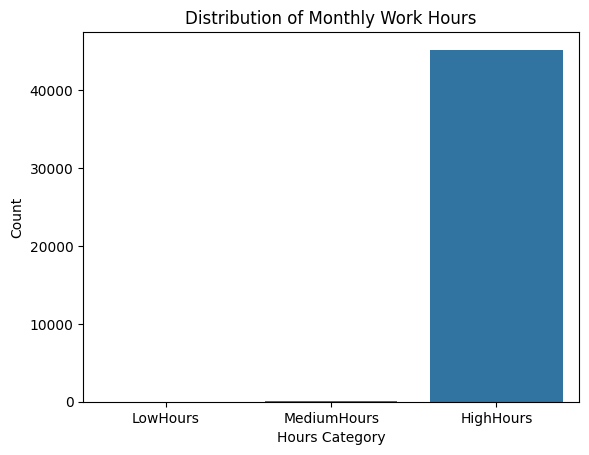

<ipython-input-6-b0a98eb0acdc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BillLevel', data=df, palette='Set2')


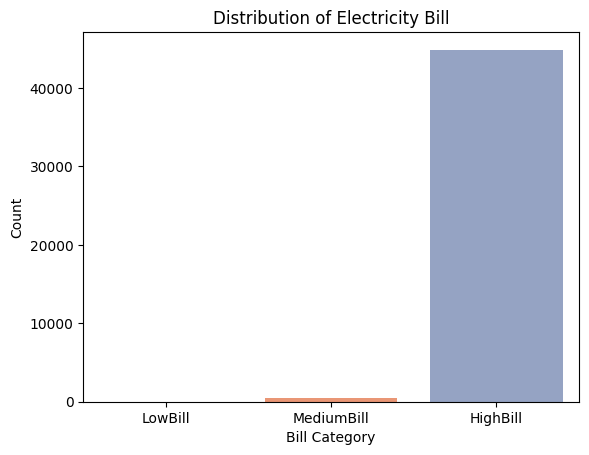

In [6]:
# Show distribution of new categories
sns.countplot(x='HoursLevel', data=df)
plt.title("Distribution of Monthly Work Hours")
plt.xlabel("Hours Category")
plt.ylabel("Count")
plt.show()

sns.countplot(x='BillLevel', data=df, palette='Set2')
plt.title("Distribution of Electricity Bill")
plt.xlabel("Bill Category")
plt.ylabel("Count")
plt.show()

In [7]:
# Create transactions
transactions = df[['HoursLevel', 'BillLevel']].values.tolist()
transactions = [[str(item) for item in row if pd.notnull(item)] for row in transactions]

In [8]:
# One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [9]:
# Generate frequent itemsets
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

    support               itemsets
0  0.989459             (HighBill)
1  0.996868            (HighHours)
2  0.989459  (HighHours, HighBill)


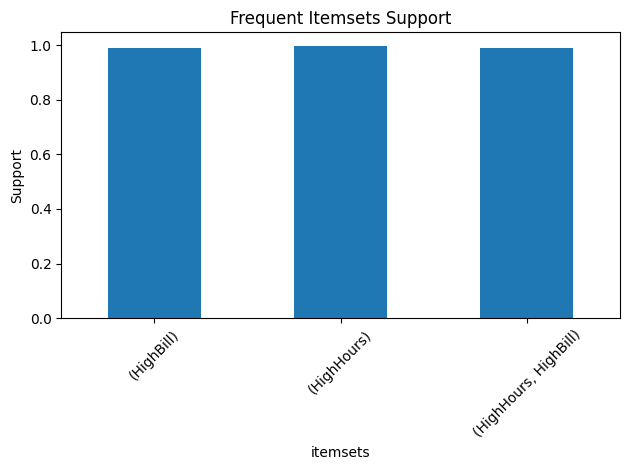

In [10]:
# Visualize support of frequent itemsets
frequent_itemsets.plot.bar(x='itemsets', y='support', legend=False)
plt.title("Frequent Itemsets Support")
plt.ylabel("Support")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by='lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

   antecedents  consequents   support  confidence      lift
0  (HighHours)   (HighBill)  0.989459    0.992567  1.003141
1   (HighBill)  (HighHours)  0.989459    1.000000  1.003141


In [12]:
# Generate association rules with min confidence of 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [13]:
# Sort rules by lift
rules = rules.sort_values(by='lift', ascending=False)

In [14]:
# Format itemsets for better display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [15]:

# Display final rules with metrics
print("\nTop Association Rules with Support, Confidence, and Lift:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))


Top Association Rules with Support, Confidence, and Lift:
antecedents consequents  support  confidence     lift
  HighHours    HighBill 0.989459    0.992567 1.003141
   HighBill   HighHours 0.989459    1.000000 1.003141


<ipython-input-16-baf6da9a366f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')


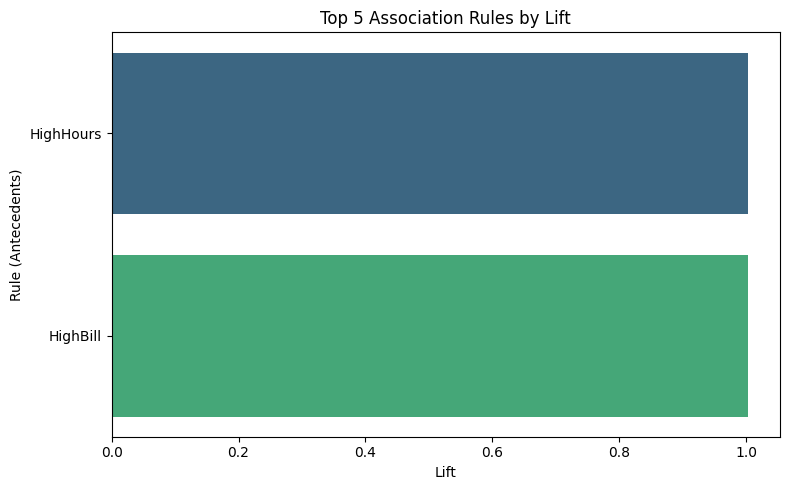

In [16]:
# Plot top 5 rules by lift
top_rules = rules.head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')
plt.xlabel('Lift')
plt.ylabel('Rule (Antecedents)')
plt.title('Top 5 Association Rules by Lift')
plt.tight_layout()
plt.show()